In [18]:
### Cargar las librerias necesarias que previamente deben ser instalados 
suppressMessages(library(raster))
suppressMessages(library(rgdal))
suppressMessages(library(RStoolbox))
suppressMessages(library(corrplot))
suppressMessages(library(FactoMineR))
suppressMessages(library(factoextra))

In [3]:
### carga la imagen
img =stack("D:/GEOBIA/usosaldana.tif")
## muestra las carácteristicas de la imagen 
dim(img)

[1] 2145 2525   10

El tamaño de la imagen es de 2145 por 2525 píxeles de 10 metros cada uno

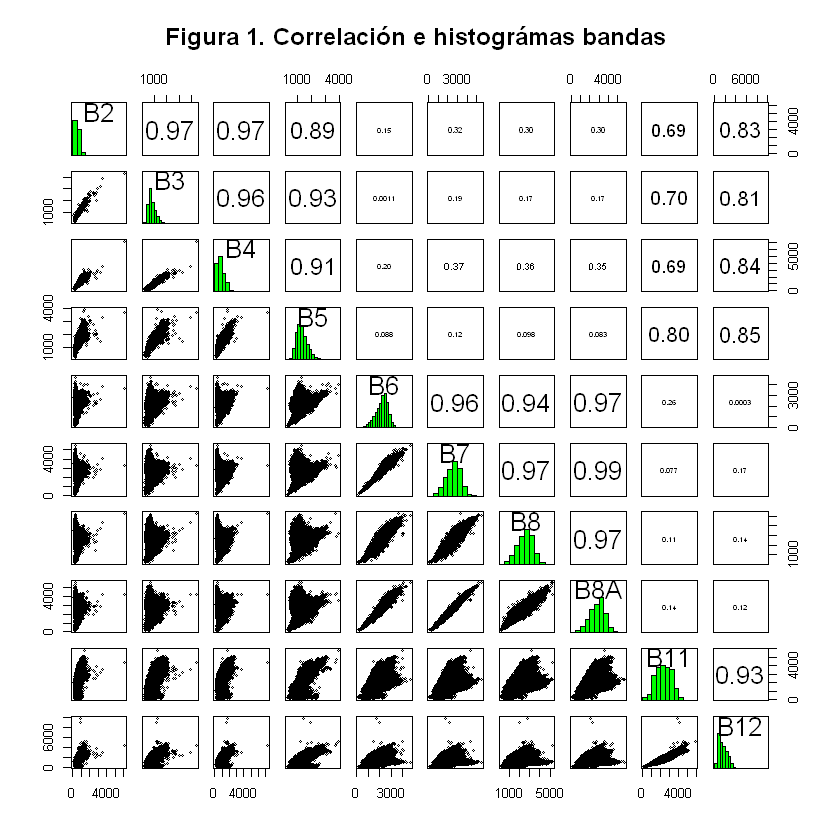

In [27]:
## renombrar las bandas 
names(img) = c("B2","B3","B4", "B5","B6","B7","B8","B8A","B11","B12")
## realizar la matriz de correlación de las bandas 
pairs(img,main="Figura 1. Correlación e histográmas bandas ", font.labels=1, label.pos=1)

In [6]:
### se convierte la imagen en un data frame
df = as.data.frame(img)
### correlación del dataframe, se convierte a matriz y se redondean valores a 2 cifras decimales
mat = as.matrix(round(cor(na.omit(df)),2))

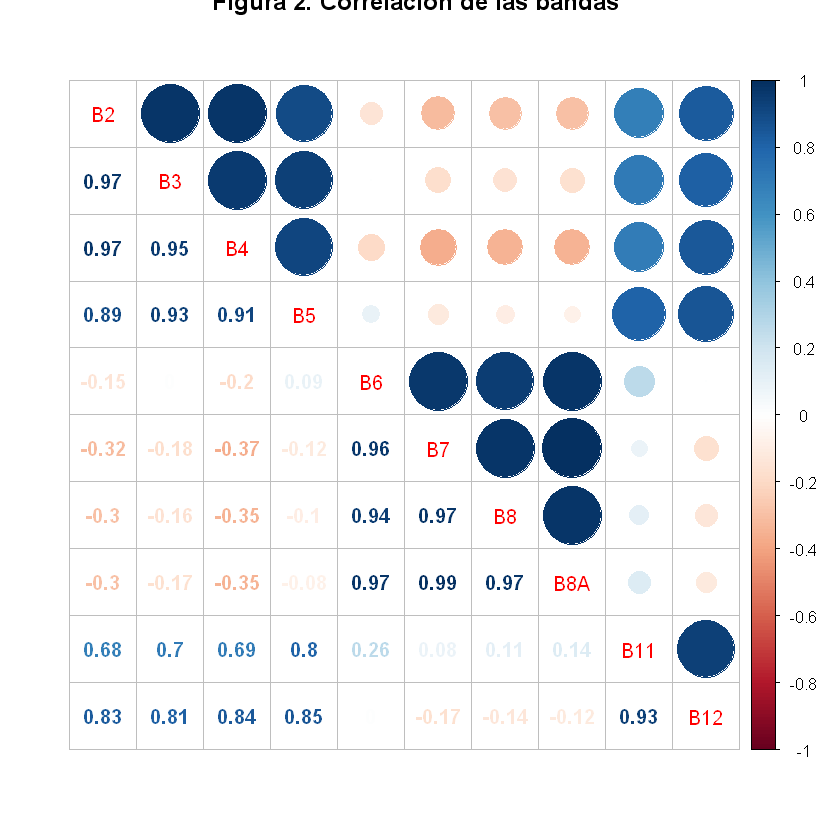

In [29]:
## plotear matriz de correlación de la imagen, otra manera de visualizar 
corrplot.mixed(mat, number.cex = 1, main="Figura 2. Correlación de las bandas " )

En las figuras 1 y 2 se puede observar como las bandas que están más cerca en el espectro presentan valores altos de correlación positiva en todos los casos ejemplo B2 con B3, B3 con B4, B8 con B7, B11 y B12, es de esperarse que las bandas B8A y B8 presenten una alta correlación ya que comparten una porción del espectro.   

In [25]:
### calcular los componentes principales eliminando datos faltantes y escalando resultado
acp = prcomp(na.omit(df),scale = TRUE)
### devuelve la importancia de cada uno de los componentes 
summary(acp)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5    PC6    PC7
Standard deviation     2.3520 1.9491 0.66262 0.31544 0.21049 0.1788 0.1549
Proportion of Variance 0.5532 0.3799 0.04391 0.00995 0.00443 0.0032 0.0024
Cumulative Proportion  0.5532 0.9331 0.97700 0.98695 0.99138 0.9946 0.9970
                           PC8     PC9    PC10
Standard deviation     0.11935 0.09697 0.08086
Proportion of Variance 0.00142 0.00094 0.00065
Cumulative Proportion  0.99841 0.99935 1.00000

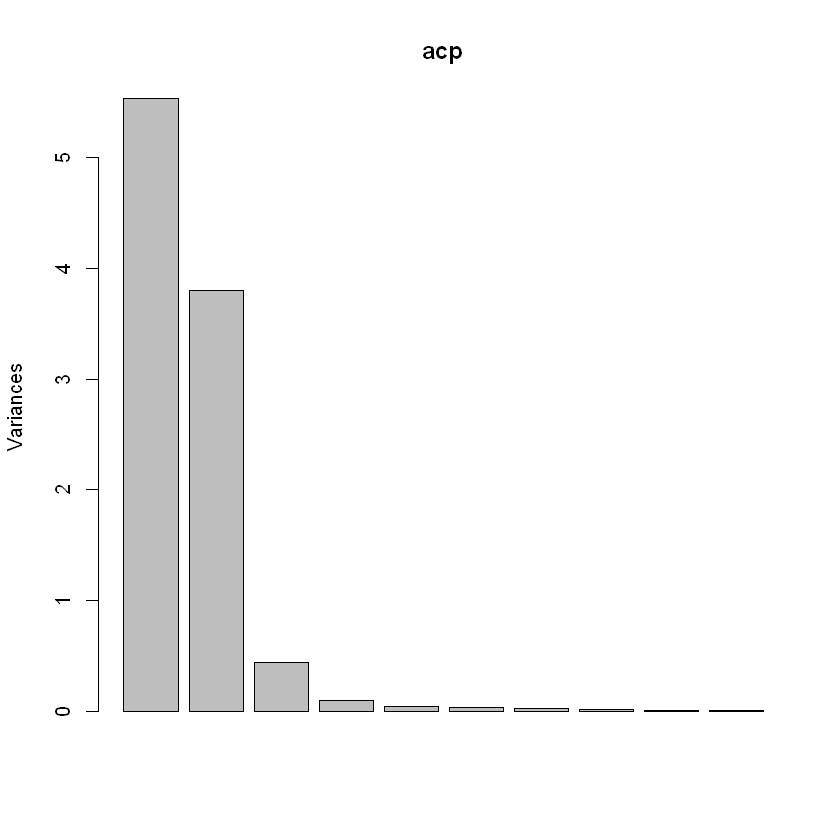

In [21]:
### grafica de barras con valores escalados ordenando de izquierda a derecha la importancia de cada componente 
screeplot(acp)

Al observar el resultado y la gráfica de la importancia de cada componente se puede concluir que los primeros 4 componentes representan el 97.7% de la variabilidad que presentan todas la bandas, por lo que se seleccionan estos 4, sin embargo sería interesante hacer más pruebas considerando diferentes números de componentes así como realizar todo el proceso con todas las bandas para comparar los resultados.

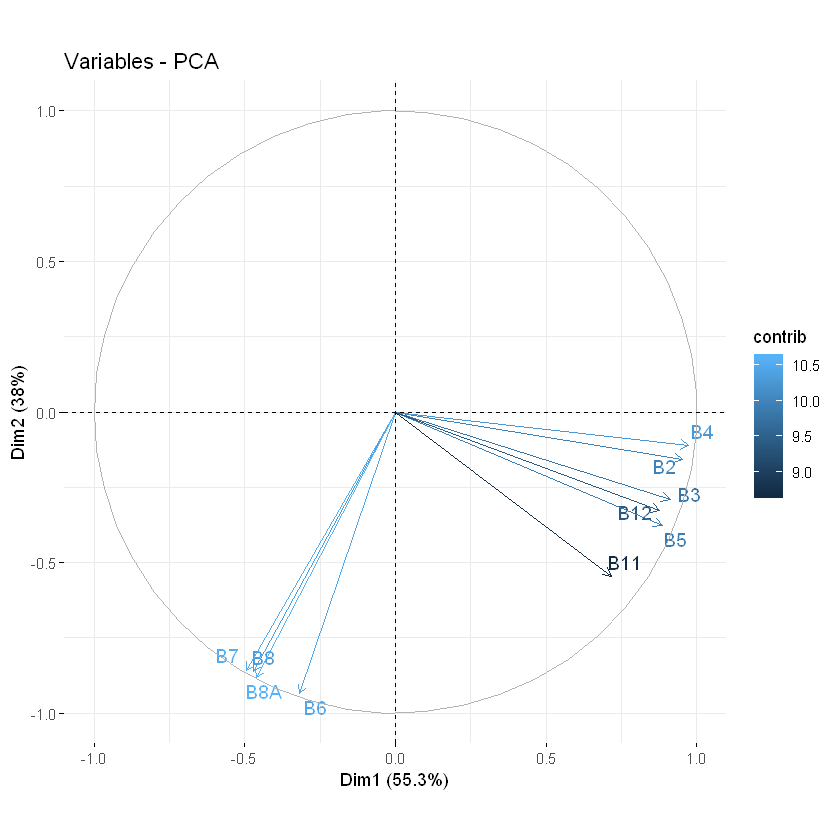

In [26]:
### gráfica del ACP y la importancia de los componentes
fviz_pca_var(acp, col.var = "contrib", bgradient.cols = c("#00AFBB","#E7B800","#F00000"), repel = TRUE)

En la gráfica anterior se observa el agrupamiento de las bandas en las dos primeras dimensiones que sumadas recojen el 93,3% de la variación, los colores azul más claros representan las bandas que indivulamente contribuyen en cada dimensión, mientras que los azules más oscuros muestran las que tiene menor contribución, por ejemplo se puede decir que la banda 11 no representa una mayor contribución mientras que la banda 8A si lo hace. 

In [22]:
### despúes de analizar la contribución de cada componente se decidió tomar los primeros 4 componentes
pci = predict(img, acp, index = 1:4)

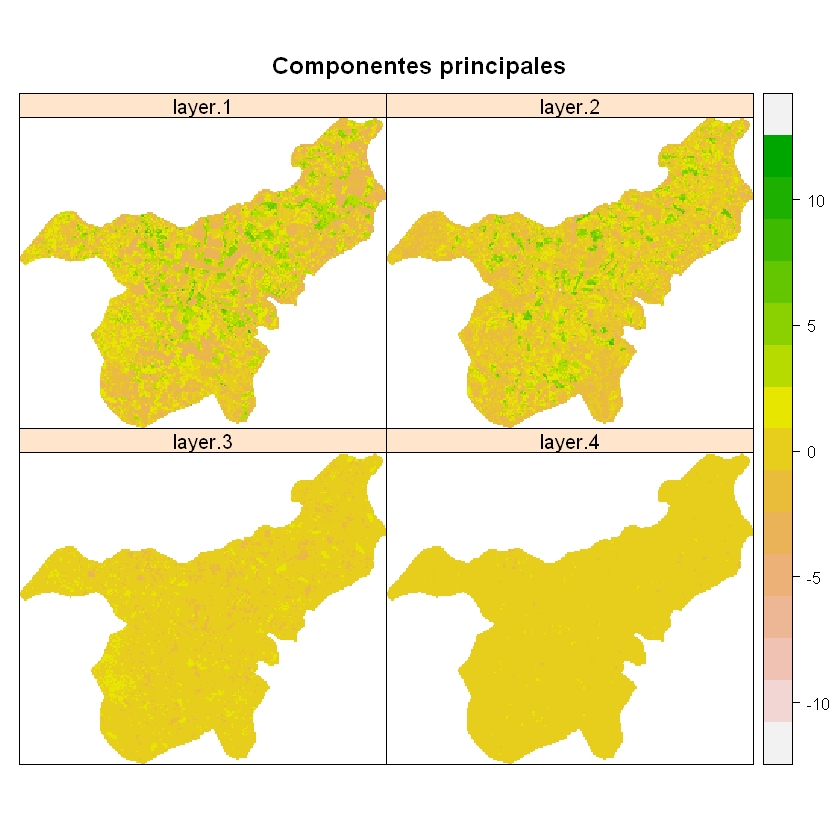

In [23]:
### ploteo de los componentes seleccionados 
spplot(pci, col.regions = rev(terrain.colors(15)), main="Componentes principales")

En la visualización de los primeros cuatro componentes de manera individual se observa como el componente uno y dos presentan un mayor contraste visual que disminuye hasta volverse casi imperceptible en el componente 4

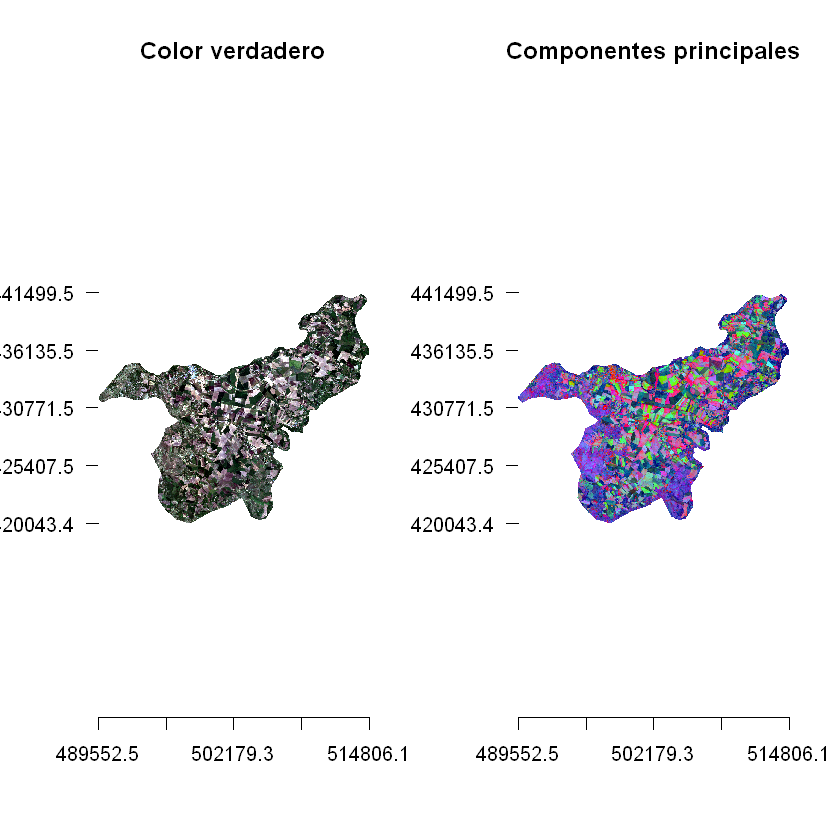

In [24]:
### ploteo de la comparación de la imagen en color verdadero y la de los primero 3 componentes pricipales  
par(mfrow = c(1,2))
plotRGB(img, 3,2,1, axes=T, stretch="lin", main="Color verdadero")
plotRGB(pci, 1,2,3, axes=T, stretch="lin", main="Componentes principales")

Al comparar las imagenes de color verdadero y la de los 3 primeros componentes se observa un mayor contraste entre los lotes sembrados en enero que aparecen de color verde oscuro en la imagen de color verdadero y un color azul-morado en la de los componetes principales respecto a lotes inundados color café oscuro que en la RGB y verde fluorecente en los 3 primeros componentes, los lotes que tienen el suelo seco se observan en tonalidades fuccsia, mientras que las tonalidades moradas corresponden tanto a rastrojos, bosques, arroz sembrado en febrero.

In [ ]:
### se guarda la imagen resultante en el directorio de trabajo
writeRaster(pci,"D:/GEOBIA/pci.tif", format="GTiff")